In [1]:
# Google Drive mount (Colab icin)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import shutil
import os
# Hedef klasör
combined_dataset_path = "/content/combined_dataset"

# Kaynak ve hedef klasör eşleşmeleri
class_folders = {
    "inme_yok": "/content/drive/MyDrive/Colab Notebooks/teknofest/İnme Yok_kronik süreç_diğer Veri Set_PNG",
    "iskemi": "/content/drive/MyDrive/Colab Notebooks/teknofest/İskemi Veri Seti/PNG",
    "kanama": "/content/drive/MyDrive/Colab Notebooks/teknofest/Kanama Veri Seti/PNG"
}

# Kopyalama işlemi
for class_name, src_path in class_folders.items():
    dest_path = os.path.join(combined_dataset_path, class_name)
    os.makedirs(dest_path, exist_ok=True)
    for file_name in os.listdir(src_path):
        src_file = os.path.join(src_path, file_name)
        dest_file = os.path.join(dest_path, file_name)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dest_file)

print("✅ Tüm görüntüler doğru şekilde /content/combined_dataset altına kopyalandı.")


✅ Tüm görüntüler doğru şekilde /content/combined_dataset altına kopyalandı.


In [3]:
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

from torchvision import datasets, transforms, models
from tqdm import tqdm

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

dataset_path = "/content/combined_dataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [5]:
from torchvision.models import (
    vgg16, resnet50, densenet121, efficientnet_b0, mobilenet_v2
)
import torch.nn as nn

def get_model(model_name, num_classes, device):
    if model_name == "vgg16":
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier[6].parameters():
            param.requires_grad = True

    elif model_name == "resnet50":
        model = resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.fc.parameters():
            param.requires_grad = True

    elif model_name == "densenet121":
        model = densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier.parameters():
            param.requires_grad = True

    elif model_name == "efficientnet_b0":
        model = efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier[1].parameters():
            param.requires_grad = True

    elif model_name == "mobilenet_v2":
        model = mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier[1].parameters():
            param.requires_grad = True

    else:
        raise ValueError(f"Unsupported model: {model_name}")

    return model.to(device)


In [6]:
import os

epoch = 100
dataset_path = "resnetdataset"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes)  # ImageFolder ile oluşturulan dataset

model_names = ["vgg16", "resnet50", "densenet121", "efficientnet_b0", "mobilenet_v2"]

models = {}

for name in model_names:
    # Model ismini büyük harfle Model_Name olarak tanımla
    Model_Name = f"SINEM_{name.upper()}"

    # Model kayıt klasörü ve sonuç klasörünü oluştur
    model_save_path = f"Egitilen_Modeller/{dataset_path}/{Model_Name}"
    os.makedirs(model_save_path, exist_ok=True)

    result_path = f"Resut/{dataset_path}/{Model_Name}"
    os.makedirs(result_path, exist_ok=True)

    print(f"🔧 Model: {Model_Name}")
    print(f"📁 Kayıt klasörü: {model_save_path}")
    print(f"📁 Sonuç klasörü: {result_path}")

    # Modeli oluştur ve sözlüğe ekle
    model = get_model(name, num_classes, device)
    models[name] = {
        "model": model,
        "save_path": model_save_path,
        "result_path": result_path
    }


🔧 Model: SINEM_VGG16
📁 Kayıt klasörü: Egitilen_Modeller/resnetdataset/SINEM_VGG16
📁 Sonuç klasörü: Resut/resnetdataset/SINEM_VGG16


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 88.9MB/s]


🔧 Model: SINEM_RESNET50
📁 Kayıt klasörü: Egitilen_Modeller/resnetdataset/SINEM_RESNET50
📁 Sonuç klasörü: Resut/resnetdataset/SINEM_RESNET50


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 176MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Dow

🔧 Model: SINEM_DENSENET121
📁 Kayıt klasörü: Egitilen_Modeller/resnetdataset/SINEM_DENSENET121
📁 Sonuç klasörü: Resut/resnetdataset/SINEM_DENSENET121


100%|██████████| 30.8M/30.8M [00:00<00:00, 70.7MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


🔧 Model: SINEM_EFFICIENTNET_B0
📁 Kayıt klasörü: Egitilen_Modeller/resnetdataset/SINEM_EFFICIENTNET_B0
📁 Sonuç klasörü: Resut/resnetdataset/SINEM_EFFICIENTNET_B0


100%|██████████| 20.5M/20.5M [00:00<00:00, 139MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


🔧 Model: SINEM_MOBILENET_V2
📁 Kayıt klasörü: Egitilen_Modeller/resnetdataset/SINEM_MOBILENET_V2
📁 Sonuç klasörü: Resut/resnetdataset/SINEM_MOBILENET_V2


100%|██████████| 13.6M/13.6M [00:00<00:00, 61.1MB/s]


In [7]:
from torchvision import transforms, datasets

# Görselleştirme için sadece resize ve tensor
transform_visualization = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Görsellerin bulunduğu klasör (ImageFolder formatında)
visualization_dataset = datasets.ImageFolder("/content/combined_dataset", transform=transform_visualization)
class_names = visualization_dataset.classes

# Eğitim, doğrulama ve test dönüşümleri
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [8]:
# Toplam görüntü sayısını yazdır
print(f"Toplam {len(visualization_dataset)} adet görüntü var.")
# Her sınıf için örnek görsellerin görselleştirilmesi
class_names = visualization_dataset.classes  # Sınıf isimlerini alıyoruz
print(f"{len(class_names)} Tane Sınıf var. \n Sınıf İsimleri : {class_names}")


Toplam 2273 adet görüntü var.
3 Tane Sınıf var. 
 Sınıf İsimleri : ['inme_yok', 'iskemi', 'kanama']


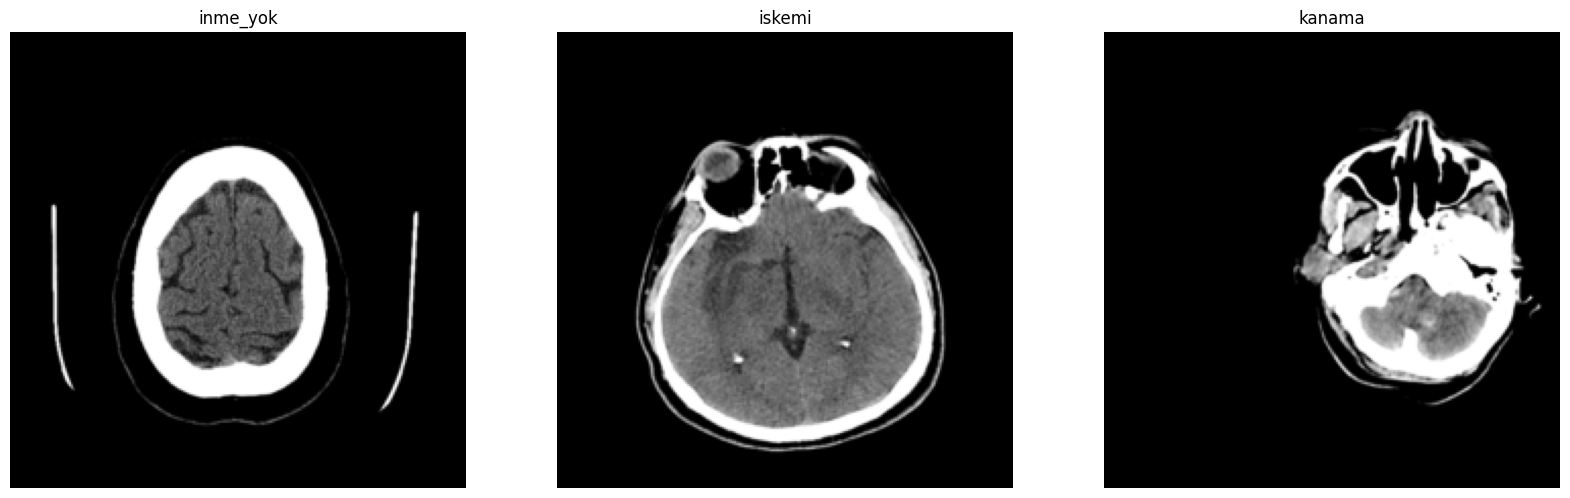

In [9]:
fig, axes = plt.subplots(1, len(class_names), figsize=(20, 15))  # Sınıf sayısına göre alt grafik oluşturuyoruz

for i, class_name in enumerate(class_names):
    class_idx = visualization_dataset.class_to_idx[class_name]  # Sınıfın index'ini alıyoruz
    class_subset = [idx for idx, (_, target) in enumerate(
        visualization_dataset) if target == class_idx]  # O sınıfa ait örneklerin indekslerini alıyoruz
    sample_idx = np.random.choice(class_subset, 1)[0]  # Rastgele bir örnek seçiyoruz
    img, label = visualization_dataset[sample_idx]  # Görseli ve etiketini alıyoruz
    axes[i].imshow(img.permute(1, 2, 0))  # Tensörü görselleştirmeye dönüştürüyoruz
    axes[i].set_title(class_name)  # Görselin başlığı sınıf ismi
    axes[i].axis('off')  # Ekseni gizliyoruz

In [10]:
import matplotlib.pyplot as plt
from torchvision import datasets

plt.tight_layout()
plt.show()

# DÜZELTİLDİ: Doğru klasör yolu
dataset_path = "/content/combined_dataset"

# Dataset tanımlama ve bölme
full_dataset = datasets.ImageFolder(dataset_path, transform=transform)

train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(full_dataset) * train_ratio)
val_size = int(len(full_dataset) * val_ratio)
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size]
)


<Figure size 640x480 with 0 Axes>

In [11]:
# Ayrıntıları yazdırma
print(f"Toplam veri kümesi: {len(full_dataset)} görüntü")
print(f"Eğitim seti: {train_size} görüntü (%{train_ratio*100:.1f})")
print(f"Doğrulama seti: {val_size} görüntü (%{val_ratio*100:.1f})")
print(f"Test seti: {test_size} görüntü (%{(1 - train_ratio - val_ratio)*100:.1f})")


Toplam veri kümesi: 2273 görüntü
Eğitim seti: 1591 görüntü (%70.0)
Doğrulama seti: 340 görüntü (%15.0)
Test seti: 342 görüntü (%15.0)


In [12]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [14]:
# Cihaz bilgisini yazdırma
if device.type == "cuda":
    print(f"Kod GPU üzerinde çalışıyor. (Cihaz: {torch.cuda.get_device_name(0)})")
else:
    print("Kod CPU üzerinde çalışıyor.")

Kod GPU üzerinde çalışıyor. (Cihaz: Tesla T4)


In [15]:
from torchvision import models

# Transfer learning için önceden eğitilmiş VGG16 modelini yükleme
model = models.vgg16(pretrained=True)


num_classes = len(full_dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

for param in model.parameters():
    param.requires_grad = False

for param in model.classifier[6].parameters():
    param.requires_grad = True

model = model.to(device)



In [16]:
model = models.resnet50(pretrained=True)
num_classes = len(full_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)


In [17]:
model = models.densenet121(pretrained=True)
num_classes = len(full_dataset.classes)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

model = model.to(device)


In [18]:
model = models.efficientnet_b0(pretrained=True)
num_classes = len(full_dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

for param in model.parameters():
    param.requires_grad = False
for param in model.classifier[1].parameters():
    param.requires_grad = True

model = model.to(device)


In [19]:
model = models.mobilenet_v2(pretrained=True)
num_classes = len(full_dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

for param in model.parameters():
    param.requires_grad = False
for param in model.classifier[1].parameters():
    param.requires_grad = True

model = model.to(device)


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
from tqdm import tqdm

model_names = ["vgg16", "resnet50", "densenet121", "efficientnet_b0", "mobilenet_v2"]
epoch = 100
dataset_tag = os.path.basename(dataset_path.strip("/"))  # örnek: "combined_dataset"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes)

for model_name in model_names:
    print(f"\n==============================")
    print(f"🔧 Eğitim Başladı: {model_name.upper()}")
    print(f"==============================")

    # Model oluştur
    model = get_model(model_name, num_classes, device)

    # Klasör adları
    Model_Name = f"SINEM_{model_name.upper()}"
    model_save_path = f"Egitilen_Modeller/{dataset_tag}/{Model_Name}"
    result_path = f"Resut/{dataset_tag}/{Model_Name}"
    os.makedirs(model_save_path, exist_ok=True)
    os.makedirs(result_path, exist_ok=True)

    # Kayıp ve optimizasyon
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)
    patience = 15
    best_val_loss = float('inf')
    patience_counter = 0

    # Kayıt listeleri
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    # Log dosyası
    log_file = os.path.join(result_path, f"Transfer-Learning-{Model_Name}_Epoch_LOG.txt")
    with open(log_file, "w") as file:
        file.write("Epoch\tTrain Loss\tVal Loss\tTrain Acc\tVal Acc\tLR\n")

    for ep in range(epoch):
        print(f"\nEpoch {ep + 1}/{epoch}")
        model.train()
        train_loss, train_correct = 0, 0
        for inputs, targets in tqdm(train_loader, desc=f"Training Epoch {ep + 1}"):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == targets).sum().item()
        train_acc = train_correct / len(train_loader.dataset)

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc=f"Validating Epoch {ep + 1}"):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_correct += (outputs.argmax(1) == targets).sum().item()
        val_acc = val_correct / len(val_loader.dataset)

        # Kayıtlar
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Epoch {ep + 1}/{epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, LR: {current_lr:.9f}")

        with open(log_file, "a") as file:
            file.write(f"{ep+1}\t{train_loss/len(train_loader):.4f}\t{val_loss/len(val_loader):.4f}\t"
                       f"{train_acc:.4f}\t{val_acc:.4f}\t{current_lr:.9f}\n")

        # Early stopping ve model kaydı
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_path = os.path.join(model_save_path, f"Best_{Model_Name}-{dataset_tag}.pth")
            torch.save(model.state_dict(), best_model_path)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("⏹️ Early stopping etkin. Doğrulama kaybı iyileşmedi.")
                break

    print(f"\n✅ {Model_Name} eğitimi tamamlandı. En iyi model: {best_model_path}")



🔧 Eğitim Başladı: VGG16

Epoch 1/100


Validating Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]


Epoch 1/100: Train Loss: 42.7067, Val Loss: 8.1652, Train Acc: 0.5600, Val Acc: 0.6147, LR: 0.001000000

Epoch 2/100


Validating Epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]


Epoch 2/100: Train Loss: 41.5953, Val Loss: 7.6540, Train Acc: 0.5789, Val Acc: 0.6618, LR: 0.001000000

Epoch 3/100


Validating Epoch 3: 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]


Epoch 3/100: Train Loss: 38.7892, Val Loss: 8.1742, Train Acc: 0.6053, Val Acc: 0.6235, LR: 0.001000000

Epoch 4/100


Validating Epoch 4: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 4/100: Train Loss: 39.0795, Val Loss: 8.3132, Train Acc: 0.6141, Val Acc: 0.6265, LR: 0.001000000

Epoch 5/100


Validating Epoch 5: 100%|██████████| 11/11 [00:05<00:00,  2.16it/s]


Epoch 5/100: Train Loss: 40.5220, Val Loss: 7.6287, Train Acc: 0.5946, Val Acc: 0.6647, LR: 0.001000000

Epoch 6/100


Validating Epoch 6: 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


Epoch 6/100: Train Loss: 39.1716, Val Loss: 7.7947, Train Acc: 0.5971, Val Acc: 0.6647, LR: 0.001000000

Epoch 7/100


Validating Epoch 7: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


Epoch 7/100: Train Loss: 37.9097, Val Loss: 7.4068, Train Acc: 0.6223, Val Acc: 0.6735, LR: 0.001000000

Epoch 8/100


Validating Epoch 8: 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


Epoch 8/100: Train Loss: 40.9139, Val Loss: 7.8380, Train Acc: 0.5889, Val Acc: 0.6206, LR: 0.001000000

Epoch 9/100


Validating Epoch 9: 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]


Epoch 9/100: Train Loss: 39.3094, Val Loss: 7.4959, Train Acc: 0.6166, Val Acc: 0.6706, LR: 0.001000000

Epoch 10/100


Validating Epoch 10: 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


Epoch 10/100: Train Loss: 38.0965, Val Loss: 7.5319, Train Acc: 0.6254, Val Acc: 0.6706, LR: 0.001000000

Epoch 11/100


Validating Epoch 11: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 11/100: Train Loss: 38.6269, Val Loss: 8.1779, Train Acc: 0.6241, Val Acc: 0.5853, LR: 0.001000000

Epoch 12/100


Validating Epoch 12: 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


Epoch 12/100: Train Loss: 37.3923, Val Loss: 8.2244, Train Acc: 0.6417, Val Acc: 0.6176, LR: 0.001000000

Epoch 13/100


Validating Epoch 13: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


Epoch 13/100: Train Loss: 39.0629, Val Loss: 7.7065, Train Acc: 0.6285, Val Acc: 0.6824, LR: 0.000100000

Epoch 14/100


Validating Epoch 14: 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


Epoch 14/100: Train Loss: 37.5414, Val Loss: 7.5556, Train Acc: 0.6210, Val Acc: 0.6412, LR: 0.000100000

Epoch 15/100


Validating Epoch 15: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 15/100: Train Loss: 38.1157, Val Loss: 7.6867, Train Acc: 0.6285, Val Acc: 0.6765, LR: 0.000100000

Epoch 16/100


Validating Epoch 16: 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


Epoch 16/100: Train Loss: 37.1760, Val Loss: 7.6371, Train Acc: 0.6361, Val Acc: 0.6353, LR: 0.000100000

Epoch 17/100


Validating Epoch 17: 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]


Epoch 17/100: Train Loss: 35.6544, Val Loss: 8.0217, Train Acc: 0.6505, Val Acc: 0.6412, LR: 0.000100000

Epoch 18/100


Validating Epoch 18: 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]


Epoch 18/100: Train Loss: 36.7768, Val Loss: 7.3572, Train Acc: 0.6392, Val Acc: 0.6765, LR: 0.000100000

Epoch 19/100


Validating Epoch 19: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]


Epoch 19/100: Train Loss: 36.8540, Val Loss: 7.4274, Train Acc: 0.6304, Val Acc: 0.6882, LR: 0.000100000

Epoch 20/100


Validating Epoch 20: 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]


Epoch 20/100: Train Loss: 37.6553, Val Loss: 7.9042, Train Acc: 0.6398, Val Acc: 0.6441, LR: 0.000100000

Epoch 21/100


Validating Epoch 21: 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]


Epoch 21/100: Train Loss: 37.6089, Val Loss: 7.3934, Train Acc: 0.6342, Val Acc: 0.6647, LR: 0.000100000

Epoch 22/100


Validating Epoch 22: 100%|██████████| 11/11 [00:04<00:00,  2.28it/s]


Epoch 22/100: Train Loss: 35.4350, Val Loss: 7.8208, Train Acc: 0.6587, Val Acc: 0.6706, LR: 0.000100000

Epoch 23/100


Validating Epoch 23: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]


Epoch 23/100: Train Loss: 36.6269, Val Loss: 7.7605, Train Acc: 0.6380, Val Acc: 0.6647, LR: 0.000100000

Epoch 24/100


Validating Epoch 24: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]


Epoch 24/100: Train Loss: 35.9573, Val Loss: 7.6408, Train Acc: 0.6593, Val Acc: 0.6706, LR: 0.000010000

Epoch 25/100


Validating Epoch 25: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]


Epoch 25/100: Train Loss: 37.2104, Val Loss: 7.6024, Train Acc: 0.6354, Val Acc: 0.6676, LR: 0.000010000

Epoch 26/100


Validating Epoch 26: 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Epoch 26/100: Train Loss: 36.6267, Val Loss: 7.7029, Train Acc: 0.6260, Val Acc: 0.6412, LR: 0.000010000

Epoch 27/100


Validating Epoch 27: 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]


Epoch 27/100: Train Loss: 35.7064, Val Loss: 7.6379, Train Acc: 0.6424, Val Acc: 0.6500, LR: 0.000010000

Epoch 28/100


Validating Epoch 28: 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


Epoch 28/100: Train Loss: 36.4309, Val Loss: 7.1575, Train Acc: 0.6493, Val Acc: 0.6853, LR: 0.000010000

Epoch 29/100


Validating Epoch 29: 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


Epoch 29/100: Train Loss: 35.7136, Val Loss: 7.2380, Train Acc: 0.6461, Val Acc: 0.6794, LR: 0.000010000

Epoch 30/100


Validating Epoch 30: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


Epoch 30/100: Train Loss: 37.9504, Val Loss: 7.5254, Train Acc: 0.6248, Val Acc: 0.6971, LR: 0.000010000

Epoch 31/100


Validating Epoch 31: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


Epoch 31/100: Train Loss: 36.9138, Val Loss: 7.3896, Train Acc: 0.6392, Val Acc: 0.7147, LR: 0.000010000

Epoch 32/100


Validating Epoch 32: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


Epoch 32/100: Train Loss: 35.5520, Val Loss: 7.4636, Train Acc: 0.6562, Val Acc: 0.6882, LR: 0.000010000

Epoch 33/100


Validating Epoch 33: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 33/100: Train Loss: 37.7002, Val Loss: 7.3856, Train Acc: 0.6304, Val Acc: 0.6765, LR: 0.000010000

Epoch 34/100


Validating Epoch 34: 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]


Epoch 34/100: Train Loss: 36.0445, Val Loss: 7.2858, Train Acc: 0.6392, Val Acc: 0.6941, LR: 0.000001000

Epoch 35/100


Validating Epoch 35: 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]


Epoch 35/100: Train Loss: 36.1729, Val Loss: 7.1451, Train Acc: 0.6373, Val Acc: 0.6941, LR: 0.000001000

Epoch 36/100


Validating Epoch 36: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 36/100: Train Loss: 36.0739, Val Loss: 7.4792, Train Acc: 0.6499, Val Acc: 0.6471, LR: 0.000001000

Epoch 37/100


Validating Epoch 37: 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


Epoch 37/100: Train Loss: 35.9974, Val Loss: 7.7001, Train Acc: 0.6549, Val Acc: 0.6500, LR: 0.000001000

Epoch 38/100


Validating Epoch 38: 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


Epoch 38/100: Train Loss: 35.6560, Val Loss: 7.5684, Train Acc: 0.6499, Val Acc: 0.6912, LR: 0.000001000

Epoch 39/100


Validating Epoch 39: 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]


Epoch 39/100: Train Loss: 37.0692, Val Loss: 7.5748, Train Acc: 0.6248, Val Acc: 0.6441, LR: 0.000001000

Epoch 40/100


Validating Epoch 40: 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Epoch 40/100: Train Loss: 35.6972, Val Loss: 7.5522, Train Acc: 0.6474, Val Acc: 0.6735, LR: 0.000001000

Epoch 41/100


Validating Epoch 41: 100%|██████████| 11/11 [00:04<00:00,  2.20it/s]


Epoch 41/100: Train Loss: 36.3034, Val Loss: 7.6290, Train Acc: 0.6336, Val Acc: 0.6765, LR: 0.000000100

Epoch 42/100


Validating Epoch 42: 100%|██████████| 11/11 [00:05<00:00,  2.16it/s]


Epoch 42/100: Train Loss: 34.8776, Val Loss: 7.5836, Train Acc: 0.6530, Val Acc: 0.6471, LR: 0.000000100

Epoch 43/100


Validating Epoch 43: 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]


Epoch 43/100: Train Loss: 36.5666, Val Loss: 7.4009, Train Acc: 0.6424, Val Acc: 0.6647, LR: 0.000000100

Epoch 44/100


Validating Epoch 44: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]


Epoch 44/100: Train Loss: 36.4678, Val Loss: 7.5454, Train Acc: 0.6398, Val Acc: 0.6765, LR: 0.000000100

Epoch 45/100


Validating Epoch 45: 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]


Epoch 45/100: Train Loss: 36.4153, Val Loss: 7.6137, Train Acc: 0.6436, Val Acc: 0.6676, LR: 0.000000100

Epoch 46/100


Validating Epoch 46: 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]


Epoch 46/100: Train Loss: 35.5275, Val Loss: 7.5571, Train Acc: 0.6537, Val Acc: 0.6676, LR: 0.000000100

Epoch 47/100


Validating Epoch 47: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]


Epoch 47/100: Train Loss: 35.9036, Val Loss: 7.5982, Train Acc: 0.6505, Val Acc: 0.6471, LR: 0.000000010

Epoch 48/100


Validating Epoch 48: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


Epoch 48/100: Train Loss: 35.5840, Val Loss: 7.4427, Train Acc: 0.6574, Val Acc: 0.6941, LR: 0.000000010

Epoch 49/100


Validating Epoch 49: 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]


Epoch 49/100: Train Loss: 36.3617, Val Loss: 7.6455, Train Acc: 0.6310, Val Acc: 0.6559, LR: 0.000000010

Epoch 50/100


Validating Epoch 50: 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]


Epoch 50/100: Train Loss: 35.7667, Val Loss: 7.5295, Train Acc: 0.6424, Val Acc: 0.6794, LR: 0.000000010
⏹️ Early stopping etkin. Doğrulama kaybı iyileşmedi.

✅ SINEM_VGG16 eğitimi tamamlandı. En iyi model: Egitilen_Modeller/combined_dataset/SINEM_VGG16/Best_SINEM_VGG16-combined_dataset.pth

🔧 Eğitim Başladı: RESNET50

Epoch 1/100


Validating Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]


Epoch 1/100: Train Loss: 39.8972, Val Loss: 8.2257, Train Acc: 0.5720, Val Acc: 0.5853, LR: 0.001000000

Epoch 2/100


Validating Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]


Epoch 2/100: Train Loss: 35.6201, Val Loss: 7.7963, Train Acc: 0.6512, Val Acc: 0.6529, LR: 0.001000000

Epoch 3/100


Validating Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]


Epoch 3/100: Train Loss: 35.1935, Val Loss: 7.8142, Train Acc: 0.6512, Val Acc: 0.6324, LR: 0.001000000

Epoch 4/100


Validating Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]


Epoch 4/100: Train Loss: 34.0442, Val Loss: 7.6851, Train Acc: 0.6882, Val Acc: 0.6235, LR: 0.001000000

Epoch 5/100


Validating Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]


Epoch 5/100: Train Loss: 34.3283, Val Loss: 7.6227, Train Acc: 0.6782, Val Acc: 0.6235, LR: 0.001000000

Epoch 6/100


Validating Epoch 6: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]


Epoch 6/100: Train Loss: 33.5943, Val Loss: 7.1758, Train Acc: 0.6681, Val Acc: 0.6794, LR: 0.001000000

Epoch 7/100


Validating Epoch 7: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]


Epoch 7/100: Train Loss: 33.7946, Val Loss: 7.3152, Train Acc: 0.6688, Val Acc: 0.6471, LR: 0.001000000

Epoch 8/100


Validating Epoch 8: 100%|██████████| 11/11 [00:03<00:00,  2.85it/s]


Epoch 8/100: Train Loss: 33.9817, Val Loss: 7.3321, Train Acc: 0.6757, Val Acc: 0.6588, LR: 0.001000000

Epoch 9/100


Validating Epoch 9: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


Epoch 9/100: Train Loss: 32.2452, Val Loss: 7.8885, Train Acc: 0.6989, Val Acc: 0.6559, LR: 0.001000000

Epoch 10/100


Validating Epoch 10: 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]


Epoch 10/100: Train Loss: 32.3734, Val Loss: 7.1254, Train Acc: 0.6832, Val Acc: 0.6971, LR: 0.001000000

Epoch 11/100


Validating Epoch 11: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]


Epoch 11/100: Train Loss: 32.1918, Val Loss: 10.0049, Train Acc: 0.6939, Val Acc: 0.5529, LR: 0.001000000

Epoch 12/100


Validating Epoch 12: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


Epoch 12/100: Train Loss: 34.1705, Val Loss: 7.3875, Train Acc: 0.6656, Val Acc: 0.6853, LR: 0.001000000

Epoch 13/100


Validating Epoch 13: 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]


Epoch 13/100: Train Loss: 32.1773, Val Loss: 7.0650, Train Acc: 0.6914, Val Acc: 0.6794, LR: 0.001000000

Epoch 14/100


Validating Epoch 14: 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]


Epoch 14/100: Train Loss: 30.8842, Val Loss: 6.8083, Train Acc: 0.7058, Val Acc: 0.6941, LR: 0.001000000

Epoch 15/100


Validating Epoch 15: 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]


Epoch 15/100: Train Loss: 32.2828, Val Loss: 6.9960, Train Acc: 0.6920, Val Acc: 0.7206, LR: 0.001000000

Epoch 16/100


Validating Epoch 16: 100%|██████████| 11/11 [00:03<00:00,  3.00it/s]


Epoch 16/100: Train Loss: 32.6912, Val Loss: 7.9760, Train Acc: 0.6901, Val Acc: 0.6441, LR: 0.001000000

Epoch 17/100


Validating Epoch 17: 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]


Epoch 17/100: Train Loss: 33.4485, Val Loss: 7.4360, Train Acc: 0.6813, Val Acc: 0.6647, LR: 0.001000000

Epoch 18/100


Validating Epoch 18: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


Epoch 18/100: Train Loss: 32.0995, Val Loss: 7.1031, Train Acc: 0.6845, Val Acc: 0.6676, LR: 0.001000000

Epoch 19/100


Validating Epoch 19: 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


Epoch 19/100: Train Loss: 33.5657, Val Loss: 7.6421, Train Acc: 0.6644, Val Acc: 0.6412, LR: 0.001000000

Epoch 20/100


Validating Epoch 20: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]


Epoch 20/100: Train Loss: 32.7526, Val Loss: 7.2778, Train Acc: 0.6845, Val Acc: 0.7147, LR: 0.000100000

Epoch 21/100


Validating Epoch 21: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]


Epoch 21/100: Train Loss: 30.4492, Val Loss: 7.1502, Train Acc: 0.7272, Val Acc: 0.7118, LR: 0.000100000

Epoch 22/100


Validating Epoch 22: 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]


Epoch 22/100: Train Loss: 30.9310, Val Loss: 7.2537, Train Acc: 0.7002, Val Acc: 0.6706, LR: 0.000100000

Epoch 23/100


Validating Epoch 23: 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]


Epoch 23/100: Train Loss: 30.8074, Val Loss: 7.1639, Train Acc: 0.7121, Val Acc: 0.6853, LR: 0.000100000

Epoch 24/100


Validating Epoch 24: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]


Epoch 24/100: Train Loss: 30.6606, Val Loss: 6.9415, Train Acc: 0.6996, Val Acc: 0.7059, LR: 0.000100000

Epoch 25/100


Validating Epoch 25: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]


Epoch 25/100: Train Loss: 30.4872, Val Loss: 7.3998, Train Acc: 0.6983, Val Acc: 0.6647, LR: 0.000100000

Epoch 26/100


Validating Epoch 26: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]


Epoch 26/100: Train Loss: 29.7633, Val Loss: 7.3091, Train Acc: 0.7209, Val Acc: 0.6676, LR: 0.000010000

Epoch 27/100


Validating Epoch 27: 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]


Epoch 27/100: Train Loss: 29.7865, Val Loss: 7.1509, Train Acc: 0.7335, Val Acc: 0.7265, LR: 0.000010000

Epoch 28/100


Validating Epoch 28: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]


Epoch 28/100: Train Loss: 30.2152, Val Loss: 6.7385, Train Acc: 0.7121, Val Acc: 0.7088, LR: 0.000010000

Epoch 29/100


Validating Epoch 29: 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]


Epoch 29/100: Train Loss: 30.0092, Val Loss: 7.1109, Train Acc: 0.7027, Val Acc: 0.6882, LR: 0.000010000

Epoch 30/100


Validating Epoch 30: 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]


Epoch 30/100: Train Loss: 30.0277, Val Loss: 6.9344, Train Acc: 0.7216, Val Acc: 0.7147, LR: 0.000010000

Epoch 31/100


Validating Epoch 31: 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]


Epoch 31/100: Train Loss: 29.2715, Val Loss: 7.0943, Train Acc: 0.7335, Val Acc: 0.7029, LR: 0.000010000

Epoch 32/100


Validating Epoch 32: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]


Epoch 32/100: Train Loss: 29.3343, Val Loss: 6.8427, Train Acc: 0.7115, Val Acc: 0.7029, LR: 0.000010000

Epoch 33/100


Validating Epoch 33: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]


Epoch 33/100: Train Loss: 29.7194, Val Loss: 7.1093, Train Acc: 0.7322, Val Acc: 0.6941, LR: 0.000010000

Epoch 34/100


Validating Epoch 34: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]


Epoch 34/100: Train Loss: 29.6383, Val Loss: 7.4145, Train Acc: 0.7253, Val Acc: 0.6735, LR: 0.000001000

Epoch 35/100


Validating Epoch 35: 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]


Epoch 35/100: Train Loss: 30.8826, Val Loss: 6.7926, Train Acc: 0.6996, Val Acc: 0.7147, LR: 0.000001000

Epoch 36/100


Validating Epoch 36: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]


Epoch 36/100: Train Loss: 29.5609, Val Loss: 6.7050, Train Acc: 0.7247, Val Acc: 0.7147, LR: 0.000001000

Epoch 37/100


Validating Epoch 37: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]


Epoch 37/100: Train Loss: 30.3196, Val Loss: 7.0057, Train Acc: 0.6989, Val Acc: 0.7059, LR: 0.000001000

Epoch 38/100


Validating Epoch 38: 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]


Epoch 38/100: Train Loss: 30.2817, Val Loss: 6.5903, Train Acc: 0.7222, Val Acc: 0.7529, LR: 0.000001000

Epoch 39/100


Validating Epoch 39: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]


Epoch 39/100: Train Loss: 29.7036, Val Loss: 7.2339, Train Acc: 0.7222, Val Acc: 0.6824, LR: 0.000001000

Epoch 40/100


Validating Epoch 40: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]


Epoch 40/100: Train Loss: 29.7416, Val Loss: 6.4637, Train Acc: 0.7241, Val Acc: 0.7441, LR: 0.000001000

Epoch 41/100


Validating Epoch 41: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]


Epoch 41/100: Train Loss: 30.8948, Val Loss: 6.8226, Train Acc: 0.7071, Val Acc: 0.6912, LR: 0.000001000

Epoch 42/100


Validating Epoch 42: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]


Epoch 42/100: Train Loss: 29.1464, Val Loss: 7.2634, Train Acc: 0.7392, Val Acc: 0.6735, LR: 0.000001000

Epoch 43/100


Validating Epoch 43: 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]


Epoch 43/100: Train Loss: 30.0583, Val Loss: 7.2565, Train Acc: 0.7128, Val Acc: 0.6882, LR: 0.000001000

Epoch 44/100


Validating Epoch 44: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


Epoch 44/100: Train Loss: 30.3089, Val Loss: 6.7778, Train Acc: 0.7121, Val Acc: 0.7176, LR: 0.000001000

Epoch 45/100


Validating Epoch 45: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]


Epoch 45/100: Train Loss: 30.3681, Val Loss: 7.2846, Train Acc: 0.7109, Val Acc: 0.6853, LR: 0.000001000

Epoch 46/100


Validating Epoch 46: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]


Epoch 46/100: Train Loss: 29.5099, Val Loss: 7.1089, Train Acc: 0.7266, Val Acc: 0.6794, LR: 0.000000100

Epoch 47/100


Validating Epoch 47: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]


Epoch 47/100: Train Loss: 30.6490, Val Loss: 6.9845, Train Acc: 0.7096, Val Acc: 0.7176, LR: 0.000000100

Epoch 48/100


Validating Epoch 48: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]


Epoch 48/100: Train Loss: 29.4390, Val Loss: 7.1087, Train Acc: 0.7253, Val Acc: 0.7029, LR: 0.000000100

Epoch 49/100


Validating Epoch 49: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


Epoch 49/100: Train Loss: 30.4316, Val Loss: 6.8368, Train Acc: 0.7128, Val Acc: 0.7324, LR: 0.000000100

Epoch 50/100


Validating Epoch 50: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]


Epoch 50/100: Train Loss: 29.7476, Val Loss: 7.2156, Train Acc: 0.7140, Val Acc: 0.6912, LR: 0.000000100

Epoch 51/100


Validating Epoch 51: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


Epoch 51/100: Train Loss: 29.3733, Val Loss: 6.9627, Train Acc: 0.7247, Val Acc: 0.7176, LR: 0.000000100

Epoch 52/100


Validating Epoch 52: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]


Epoch 52/100: Train Loss: 30.4687, Val Loss: 7.0076, Train Acc: 0.6939, Val Acc: 0.7088, LR: 0.000000010

Epoch 53/100


Validating Epoch 53: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]


Epoch 53/100: Train Loss: 30.5935, Val Loss: 6.8293, Train Acc: 0.7084, Val Acc: 0.7029, LR: 0.000000010

Epoch 54/100


Validating Epoch 54: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


Epoch 54/100: Train Loss: 30.1805, Val Loss: 6.9352, Train Acc: 0.7172, Val Acc: 0.7176, LR: 0.000000010

Epoch 55/100


Validating Epoch 55: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]


Epoch 55/100: Train Loss: 29.0792, Val Loss: 7.2759, Train Acc: 0.7272, Val Acc: 0.6971, LR: 0.000000010
⏹️ Early stopping etkin. Doğrulama kaybı iyileşmedi.

✅ SINEM_RESNET50 eğitimi tamamlandı. En iyi model: Egitilen_Modeller/combined_dataset/SINEM_RESNET50/Best_SINEM_RESNET50-combined_dataset.pth

🔧 Eğitim Başladı: DENSENET121

Epoch 1/100


Validating Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]


Epoch 1/100: Train Loss: 40.3881, Val Loss: 8.2145, Train Acc: 0.5745, Val Acc: 0.6029, LR: 0.001000000

Epoch 2/100


Validating Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.78it/s]


Epoch 2/100: Train Loss: 35.8892, Val Loss: 7.7170, Train Acc: 0.6329, Val Acc: 0.6588, LR: 0.001000000

Epoch 3/100


Validating Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s]


Epoch 3/100: Train Loss: 34.7551, Val Loss: 7.7552, Train Acc: 0.6669, Val Acc: 0.6324, LR: 0.001000000

Epoch 4/100


Validating Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s]


Epoch 4/100: Train Loss: 34.0448, Val Loss: 7.6910, Train Acc: 0.6769, Val Acc: 0.6588, LR: 0.001000000

Epoch 5/100


Validating Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]


Epoch 5/100: Train Loss: 33.8778, Val Loss: 7.4798, Train Acc: 0.6732, Val Acc: 0.6824, LR: 0.001000000

Epoch 6/100


Validating Epoch 6: 100%|██████████| 11/11 [00:03<00:00,  2.90it/s]


Epoch 6/100: Train Loss: 32.5513, Val Loss: 7.3375, Train Acc: 0.6983, Val Acc: 0.6941, LR: 0.001000000

Epoch 7/100


Validating Epoch 7: 100%|██████████| 11/11 [00:03<00:00,  2.99it/s]


Epoch 7/100: Train Loss: 32.1316, Val Loss: 7.0544, Train Acc: 0.7040, Val Acc: 0.7147, LR: 0.001000000

Epoch 8/100


Validating Epoch 8: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]


Epoch 8/100: Train Loss: 32.0070, Val Loss: 7.6620, Train Acc: 0.7096, Val Acc: 0.6588, LR: 0.001000000

Epoch 9/100


Validating Epoch 9: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]


Epoch 9/100: Train Loss: 31.2807, Val Loss: 7.2303, Train Acc: 0.7172, Val Acc: 0.7088, LR: 0.001000000

Epoch 10/100


Validating Epoch 10: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


Epoch 10/100: Train Loss: 31.5476, Val Loss: 7.4859, Train Acc: 0.6989, Val Acc: 0.6706, LR: 0.001000000

Epoch 11/100


Validating Epoch 11: 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


Epoch 11/100: Train Loss: 31.8657, Val Loss: 7.1209, Train Acc: 0.7071, Val Acc: 0.6971, LR: 0.001000000

Epoch 12/100


Validating Epoch 12: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]


Epoch 12/100: Train Loss: 30.5223, Val Loss: 7.1278, Train Acc: 0.7241, Val Acc: 0.7000, LR: 0.001000000

Epoch 13/100


Validating Epoch 13: 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]


Epoch 13/100: Train Loss: 31.0332, Val Loss: 7.0573, Train Acc: 0.7077, Val Acc: 0.7059, LR: 0.000100000

Epoch 14/100


Validating Epoch 14: 100%|██████████| 11/11 [00:03<00:00,  3.00it/s]


Epoch 14/100: Train Loss: 30.3310, Val Loss: 6.7661, Train Acc: 0.7159, Val Acc: 0.7324, LR: 0.000100000

Epoch 15/100


Validating Epoch 15: 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]


Epoch 15/100: Train Loss: 30.8681, Val Loss: 6.9743, Train Acc: 0.7008, Val Acc: 0.6882, LR: 0.000100000

Epoch 16/100


Validating Epoch 16: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]


Epoch 16/100: Train Loss: 30.2965, Val Loss: 6.8144, Train Acc: 0.7159, Val Acc: 0.7294, LR: 0.000100000

Epoch 17/100


Validating Epoch 17: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]


Epoch 17/100: Train Loss: 29.2797, Val Loss: 7.1604, Train Acc: 0.7398, Val Acc: 0.6706, LR: 0.000100000

Epoch 18/100


Validating Epoch 18: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


Epoch 18/100: Train Loss: 30.8235, Val Loss: 7.2302, Train Acc: 0.7109, Val Acc: 0.7029, LR: 0.000100000

Epoch 19/100


Validating Epoch 19: 100%|██████████| 11/11 [00:03<00:00,  2.88it/s]


Epoch 19/100: Train Loss: 29.7597, Val Loss: 6.9097, Train Acc: 0.7297, Val Acc: 0.7265, LR: 0.000100000

Epoch 20/100


Validating Epoch 20: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


Epoch 20/100: Train Loss: 29.5644, Val Loss: 7.1555, Train Acc: 0.7310, Val Acc: 0.6706, LR: 0.000010000

Epoch 21/100


Validating Epoch 21: 100%|██████████| 11/11 [00:03<00:00,  2.99it/s]


Epoch 21/100: Train Loss: 30.1739, Val Loss: 6.9610, Train Acc: 0.7184, Val Acc: 0.7029, LR: 0.000010000

Epoch 22/100


Validating Epoch 22: 100%|██████████| 11/11 [00:03<00:00,  3.00it/s]


Epoch 22/100: Train Loss: 29.9958, Val Loss: 6.9577, Train Acc: 0.7228, Val Acc: 0.7176, LR: 0.000010000

Epoch 23/100


Validating Epoch 23: 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]


Epoch 23/100: Train Loss: 29.9958, Val Loss: 7.1415, Train Acc: 0.7190, Val Acc: 0.7029, LR: 0.000010000

Epoch 24/100


Validating Epoch 24: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]


Epoch 24/100: Train Loss: 30.5525, Val Loss: 6.9359, Train Acc: 0.7065, Val Acc: 0.6941, LR: 0.000010000

Epoch 25/100


Validating Epoch 25: 100%|██████████| 11/11 [00:03<00:00,  2.95it/s]


Epoch 25/100: Train Loss: 29.2279, Val Loss: 7.2178, Train Acc: 0.7442, Val Acc: 0.7147, LR: 0.000010000

Epoch 26/100


Validating Epoch 26: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


Epoch 26/100: Train Loss: 29.7884, Val Loss: 6.8886, Train Acc: 0.7341, Val Acc: 0.7118, LR: 0.000001000

Epoch 27/100


Validating Epoch 27: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]


Epoch 27/100: Train Loss: 30.0665, Val Loss: 7.1255, Train Acc: 0.7153, Val Acc: 0.6971, LR: 0.000001000

Epoch 28/100


Validating Epoch 28: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


Epoch 28/100: Train Loss: 30.0973, Val Loss: 7.3030, Train Acc: 0.7272, Val Acc: 0.6676, LR: 0.000001000

Epoch 29/100


Validating Epoch 29: 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


Epoch 29/100: Train Loss: 29.8611, Val Loss: 6.7940, Train Acc: 0.7285, Val Acc: 0.7059, LR: 0.000001000
⏹️ Early stopping etkin. Doğrulama kaybı iyileşmedi.

✅ SINEM_DENSENET121 eğitimi tamamlandı. En iyi model: Egitilen_Modeller/combined_dataset/SINEM_DENSENET121/Best_SINEM_DENSENET121-combined_dataset.pth

🔧 Eğitim Başladı: EFFICIENTNET_B0

Epoch 1/100


Validating Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]


Epoch 1/100: Train Loss: 38.7515, Val Loss: 7.9490, Train Acc: 0.6128, Val Acc: 0.6324, LR: 0.001000000

Epoch 2/100


Validating Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]


Epoch 2/100: Train Loss: 35.2294, Val Loss: 7.3297, Train Acc: 0.6618, Val Acc: 0.6735, LR: 0.001000000

Epoch 3/100


Validating Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]


Epoch 3/100: Train Loss: 34.2918, Val Loss: 7.5220, Train Acc: 0.6675, Val Acc: 0.6529, LR: 0.001000000

Epoch 4/100


Validating Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]


Epoch 4/100: Train Loss: 33.3050, Val Loss: 7.3356, Train Acc: 0.6706, Val Acc: 0.6735, LR: 0.001000000

Epoch 5/100


Validating Epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]


Epoch 5/100: Train Loss: 32.6170, Val Loss: 7.3430, Train Acc: 0.6970, Val Acc: 0.7000, LR: 0.001000000

Epoch 6/100


Validating Epoch 6: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]


Epoch 6/100: Train Loss: 32.6798, Val Loss: 7.4355, Train Acc: 0.7084, Val Acc: 0.6382, LR: 0.001000000

Epoch 7/100


Validating Epoch 7: 100%|██████████| 11/11 [00:03<00:00,  2.75it/s]


Epoch 7/100: Train Loss: 32.4408, Val Loss: 6.6750, Train Acc: 0.6989, Val Acc: 0.6941, LR: 0.001000000

Epoch 8/100


Validating Epoch 8: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]


Epoch 8/100: Train Loss: 31.1891, Val Loss: 7.0200, Train Acc: 0.7153, Val Acc: 0.7088, LR: 0.001000000

Epoch 9/100


Validating Epoch 9: 100%|██████████| 11/11 [00:03<00:00,  2.94it/s]


Epoch 9/100: Train Loss: 32.7179, Val Loss: 7.2121, Train Acc: 0.6845, Val Acc: 0.6706, LR: 0.001000000

Epoch 10/100


Validating Epoch 10: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]


Epoch 10/100: Train Loss: 32.2857, Val Loss: 7.0770, Train Acc: 0.6914, Val Acc: 0.6941, LR: 0.001000000

Epoch 11/100


Validating Epoch 11: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


Epoch 11/100: Train Loss: 30.3683, Val Loss: 6.9265, Train Acc: 0.7146, Val Acc: 0.7324, LR: 0.001000000

Epoch 12/100


Validating Epoch 12: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]


Epoch 12/100: Train Loss: 32.4892, Val Loss: 6.9679, Train Acc: 0.6901, Val Acc: 0.7000, LR: 0.001000000

Epoch 13/100


Validating Epoch 13: 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]


Epoch 13/100: Train Loss: 32.6654, Val Loss: 7.2597, Train Acc: 0.6794, Val Acc: 0.6735, LR: 0.000100000

Epoch 14/100


Validating Epoch 14: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]


Epoch 14/100: Train Loss: 31.1344, Val Loss: 6.7661, Train Acc: 0.6964, Val Acc: 0.7206, LR: 0.000100000

Epoch 15/100


Validating Epoch 15: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]


Epoch 15/100: Train Loss: 31.8110, Val Loss: 6.8160, Train Acc: 0.6864, Val Acc: 0.6941, LR: 0.000100000

Epoch 16/100


Validating Epoch 16: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]


Epoch 16/100: Train Loss: 31.6711, Val Loss: 6.8545, Train Acc: 0.6964, Val Acc: 0.7324, LR: 0.000100000

Epoch 17/100


Validating Epoch 17: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]


Epoch 17/100: Train Loss: 30.4043, Val Loss: 6.5376, Train Acc: 0.7165, Val Acc: 0.7353, LR: 0.000100000

Epoch 18/100


Validating Epoch 18: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]


Epoch 18/100: Train Loss: 30.5748, Val Loss: 6.4876, Train Acc: 0.7190, Val Acc: 0.7118, LR: 0.000100000

Epoch 19/100


Validating Epoch 19: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s]


Epoch 19/100: Train Loss: 31.0736, Val Loss: 6.6181, Train Acc: 0.7115, Val Acc: 0.7235, LR: 0.000100000

Epoch 20/100


Validating Epoch 20: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


Epoch 20/100: Train Loss: 30.7046, Val Loss: 6.7625, Train Acc: 0.7190, Val Acc: 0.7206, LR: 0.000100000

Epoch 21/100


Validating Epoch 21: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]


Epoch 21/100: Train Loss: 30.5215, Val Loss: 6.8766, Train Acc: 0.7178, Val Acc: 0.7000, LR: 0.000100000

Epoch 22/100


Validating Epoch 22: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]


Epoch 22/100: Train Loss: 30.5520, Val Loss: 6.7927, Train Acc: 0.7197, Val Acc: 0.7353, LR: 0.000100000

Epoch 23/100


Validating Epoch 23: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]


Epoch 23/100: Train Loss: 30.7081, Val Loss: 6.6459, Train Acc: 0.7040, Val Acc: 0.7294, LR: 0.000100000

Epoch 24/100


Validating Epoch 24: 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


Epoch 24/100: Train Loss: 30.8166, Val Loss: 6.7319, Train Acc: 0.7140, Val Acc: 0.7235, LR: 0.000010000

Epoch 25/100


Validating Epoch 25: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]


Epoch 25/100: Train Loss: 30.3826, Val Loss: 6.5510, Train Acc: 0.7304, Val Acc: 0.7382, LR: 0.000010000

Epoch 26/100


Validating Epoch 26: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]


Epoch 26/100: Train Loss: 30.9730, Val Loss: 7.0483, Train Acc: 0.7033, Val Acc: 0.7118, LR: 0.000010000

Epoch 27/100


Validating Epoch 27: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]


Epoch 27/100: Train Loss: 31.2805, Val Loss: 6.9324, Train Acc: 0.6983, Val Acc: 0.7059, LR: 0.000010000

Epoch 28/100


Validating Epoch 28: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s]


Epoch 28/100: Train Loss: 31.1924, Val Loss: 6.8536, Train Acc: 0.7021, Val Acc: 0.6971, LR: 0.000010000

Epoch 29/100


Validating Epoch 29: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]


Epoch 29/100: Train Loss: 31.5974, Val Loss: 6.8607, Train Acc: 0.7021, Val Acc: 0.7029, LR: 0.000010000

Epoch 30/100


Validating Epoch 30: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]


Epoch 30/100: Train Loss: 30.3193, Val Loss: 6.7648, Train Acc: 0.7165, Val Acc: 0.7294, LR: 0.000001000

Epoch 31/100


Validating Epoch 31: 100%|██████████| 11/11 [00:03<00:00,  3.42it/s]


Epoch 31/100: Train Loss: 29.2452, Val Loss: 6.9023, Train Acc: 0.7322, Val Acc: 0.7206, LR: 0.000001000

Epoch 32/100


Validating Epoch 32: 100%|██████████| 11/11 [00:03<00:00,  2.78it/s]


Epoch 32/100: Train Loss: 31.8863, Val Loss: 6.5825, Train Acc: 0.6744, Val Acc: 0.7118, LR: 0.000001000

Epoch 33/100


Validating Epoch 33: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]


Epoch 33/100: Train Loss: 30.9200, Val Loss: 6.9674, Train Acc: 0.7033, Val Acc: 0.7088, LR: 0.000001000
⏹️ Early stopping etkin. Doğrulama kaybı iyileşmedi.

✅ SINEM_EFFICIENTNET_B0 eğitimi tamamlandı. En iyi model: Egitilen_Modeller/combined_dataset/SINEM_EFFICIENTNET_B0/Best_SINEM_EFFICIENTNET_B0-combined_dataset.pth

🔧 Eğitim Başladı: MOBILENET_V2

Epoch 1/100


Validating Epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]


Epoch 1/100: Train Loss: 38.8195, Val Loss: 8.0804, Train Acc: 0.5889, Val Acc: 0.6294, LR: 0.001000000

Epoch 2/100


Validating Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]


Epoch 2/100: Train Loss: 35.1326, Val Loss: 7.5198, Train Acc: 0.6593, Val Acc: 0.6941, LR: 0.001000000

Epoch 3/100


Validating Epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]


Epoch 3/100: Train Loss: 33.4481, Val Loss: 7.2403, Train Acc: 0.6945, Val Acc: 0.6882, LR: 0.001000000

Epoch 4/100


Validating Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s]


Epoch 4/100: Train Loss: 33.2367, Val Loss: 7.8783, Train Acc: 0.6807, Val Acc: 0.6235, LR: 0.001000000

Epoch 5/100


Validating Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


Epoch 5/100: Train Loss: 33.4954, Val Loss: 7.3165, Train Acc: 0.6738, Val Acc: 0.6706, LR: 0.001000000

Epoch 6/100


Validating Epoch 6: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s]


Epoch 6/100: Train Loss: 33.1071, Val Loss: 7.8211, Train Acc: 0.6820, Val Acc: 0.6324, LR: 0.001000000

Epoch 7/100


Validating Epoch 7: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s]


Epoch 7/100: Train Loss: 34.1443, Val Loss: 6.9575, Train Acc: 0.6524, Val Acc: 0.6765, LR: 0.001000000

Epoch 8/100


Validating Epoch 8: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]


Epoch 8/100: Train Loss: 31.1958, Val Loss: 6.6779, Train Acc: 0.7058, Val Acc: 0.7559, LR: 0.001000000

Epoch 9/100


Validating Epoch 9: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s]


Epoch 9/100: Train Loss: 32.6160, Val Loss: 7.4532, Train Acc: 0.6782, Val Acc: 0.6735, LR: 0.001000000

Epoch 10/100


Validating Epoch 10: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]


Epoch 10/100: Train Loss: 31.5305, Val Loss: 7.0917, Train Acc: 0.7090, Val Acc: 0.6912, LR: 0.001000000

Epoch 11/100


Validating Epoch 11: 100%|██████████| 11/11 [00:03<00:00,  3.61it/s]


Epoch 11/100: Train Loss: 31.7392, Val Loss: 6.8972, Train Acc: 0.6926, Val Acc: 0.7324, LR: 0.001000000

Epoch 12/100


Validating Epoch 12: 100%|██████████| 11/11 [00:03<00:00,  2.90it/s]


Epoch 12/100: Train Loss: 31.9753, Val Loss: 7.1483, Train Acc: 0.7002, Val Acc: 0.7000, LR: 0.001000000

Epoch 13/100


Validating Epoch 13: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s]


Epoch 13/100: Train Loss: 32.6064, Val Loss: 6.8423, Train Acc: 0.6864, Val Acc: 0.7206, LR: 0.001000000

Epoch 14/100


Validating Epoch 14: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]


Epoch 14/100: Train Loss: 30.3864, Val Loss: 6.6284, Train Acc: 0.7128, Val Acc: 0.7118, LR: 0.001000000

Epoch 15/100


Validating Epoch 15: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]


Epoch 15/100: Train Loss: 31.7810, Val Loss: 7.3784, Train Acc: 0.6920, Val Acc: 0.6735, LR: 0.001000000

Epoch 16/100


Validating Epoch 16: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s]


Epoch 16/100: Train Loss: 31.1361, Val Loss: 6.9738, Train Acc: 0.7128, Val Acc: 0.6941, LR: 0.001000000

Epoch 17/100


Validating Epoch 17: 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]


Epoch 17/100: Train Loss: 32.0221, Val Loss: 8.0892, Train Acc: 0.6914, Val Acc: 0.6588, LR: 0.001000000

Epoch 18/100


Validating Epoch 18: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]


Epoch 18/100: Train Loss: 32.4833, Val Loss: 6.9953, Train Acc: 0.6807, Val Acc: 0.7088, LR: 0.001000000

Epoch 19/100


Validating Epoch 19: 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]


Epoch 19/100: Train Loss: 30.9145, Val Loss: 6.8267, Train Acc: 0.7021, Val Acc: 0.6912, LR: 0.001000000

Epoch 20/100


Validating Epoch 20: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]


Epoch 20/100: Train Loss: 30.9939, Val Loss: 6.3302, Train Acc: 0.7040, Val Acc: 0.7412, LR: 0.001000000

Epoch 21/100


Validating Epoch 21: 100%|██████████| 11/11 [00:03<00:00,  3.51it/s]


Epoch 21/100: Train Loss: 31.2191, Val Loss: 7.1169, Train Acc: 0.7153, Val Acc: 0.6941, LR: 0.001000000

Epoch 22/100


Validating Epoch 22: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]


Epoch 22/100: Train Loss: 32.6022, Val Loss: 6.9484, Train Acc: 0.6945, Val Acc: 0.6971, LR: 0.001000000

Epoch 23/100


Validating Epoch 23: 100%|██████████| 11/11 [00:03<00:00,  3.62it/s]


Epoch 23/100: Train Loss: 30.6476, Val Loss: 6.6316, Train Acc: 0.7197, Val Acc: 0.7000, LR: 0.001000000

Epoch 24/100


Validating Epoch 24: 100%|██████████| 11/11 [00:03<00:00,  2.94it/s]


Epoch 24/100: Train Loss: 31.7275, Val Loss: 6.9662, Train Acc: 0.7084, Val Acc: 0.7088, LR: 0.001000000

Epoch 25/100


Validating Epoch 25: 100%|██████████| 11/11 [00:03<00:00,  3.64it/s]


Epoch 25/100: Train Loss: 30.0610, Val Loss: 6.4573, Train Acc: 0.7285, Val Acc: 0.7000, LR: 0.001000000

Epoch 26/100


Validating Epoch 26: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]


Epoch 26/100: Train Loss: 29.7832, Val Loss: 7.0837, Train Acc: 0.7310, Val Acc: 0.7000, LR: 0.000100000

Epoch 27/100


Validating Epoch 27: 100%|██████████| 11/11 [00:03<00:00,  3.57it/s]


Epoch 27/100: Train Loss: 30.4557, Val Loss: 6.5797, Train Acc: 0.7134, Val Acc: 0.7147, LR: 0.000100000

Epoch 28/100


Validating Epoch 28: 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]


Epoch 28/100: Train Loss: 30.3190, Val Loss: 6.8420, Train Acc: 0.7247, Val Acc: 0.7147, LR: 0.000100000

Epoch 29/100


Validating Epoch 29: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s]


Epoch 29/100: Train Loss: 30.5888, Val Loss: 6.6077, Train Acc: 0.7109, Val Acc: 0.7294, LR: 0.000100000

Epoch 30/100


Validating Epoch 30: 100%|██████████| 11/11 [00:03<00:00,  3.66it/s]


Epoch 30/100: Train Loss: 30.2236, Val Loss: 6.8610, Train Acc: 0.7084, Val Acc: 0.7118, LR: 0.000100000

Epoch 31/100


Validating Epoch 31: 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


Epoch 31/100: Train Loss: 30.1747, Val Loss: 6.6738, Train Acc: 0.7040, Val Acc: 0.7382, LR: 0.000100000

Epoch 32/100


Validating Epoch 32: 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]


Epoch 32/100: Train Loss: 29.7289, Val Loss: 6.6857, Train Acc: 0.7140, Val Acc: 0.7265, LR: 0.000010000

Epoch 33/100


Validating Epoch 33: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]


Epoch 33/100: Train Loss: 30.2378, Val Loss: 6.8523, Train Acc: 0.7234, Val Acc: 0.6824, LR: 0.000010000

Epoch 34/100


Validating Epoch 34: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]


Epoch 34/100: Train Loss: 30.2271, Val Loss: 6.6506, Train Acc: 0.7178, Val Acc: 0.7353, LR: 0.000010000

Epoch 35/100


Validating Epoch 35: 100%|██████████| 11/11 [00:03<00:00,  2.86it/s]

Epoch 35/100: Train Loss: 28.4894, Val Loss: 7.0573, Train Acc: 0.7517, Val Acc: 0.7206, LR: 0.000010000
⏹️ Early stopping etkin. Doğrulama kaybı iyileşmedi.

✅ SINEM_MOBILENET_V2 eğitimi tamamlandı. En iyi model: Egitilen_Modeller/combined_dataset/SINEM_MOBILENET_V2/Best_SINEM_MOBILENET_V2-combined_dataset.pth


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Aynı model isimleri ve klasör düzeni varsayılıyor
model_names = ["vgg16", "resnet50", "densenet121", "efficientnet_b0", "mobilenet_v2"]
dataset_tag = os.path.basename(dataset_path.strip("/"))  # Örn: combined_dataset

for model_name in model_names:
    Model_Name = f"SINEM_{model_name.upper()}"
    result_path = f"Resut/{dataset_tag}/{Model_Name}"
    log_file = os.path.join(result_path, f"Transfer-Learning-{Model_Name}_Epoch_LOG.txt")

    if not os.path.exists(log_file):
        print(f"❌ Log dosyası bulunamadı: {log_file}")
        continue

    # Log dosyasını oku
    epochs, train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], [], []
    with open(log_file, "r") as file:
        next(file)  # başlığı atla
        for line in file:
            parts = line.strip().split("\t")
            epochs.append(int(parts[0]))
            train_losses.append(float(parts[1]))
            val_losses.append(float(parts[2]))
            train_accuracies.append(float(parts[3]))
            val_accuracies.append(float(parts[4]))

    # Grafik çizimi
    plt.figure(figsize=(20, 6))

    # Loss grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss over Epochs ({Model_Name})')
    plt.legend()

    # Accuracy grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy over Epochs ({Model_Name})')
    plt.legend()

    # Kaydet
    save_path = os.path.join(result_path, f"training_metrics_{Model_Name}.png")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

    print(f"✅ Grafik kaydedildi: {save_path}")


✅ Grafik kaydedildi: Resut/combined_dataset/SINEM_VGG16/training_metrics_SINEM_VGG16.png
✅ Grafik kaydedildi: Resut/combined_dataset/SINEM_RESNET50/training_metrics_SINEM_RESNET50.png
✅ Grafik kaydedildi: Resut/combined_dataset/SINEM_DENSENET121/training_metrics_SINEM_DENSENET121.png
✅ Grafik kaydedildi: Resut/combined_dataset/SINEM_EFFICIENTNET_B0/training_metrics_SINEM_EFFICIENTNET_B0.png
✅ Grafik kaydedildi: Resut/combined_dataset/SINEM_MOBILENET_V2/training_metrics_SINEM_MOBILENET_V2.png


In [22]:
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(targets.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

model_names = ["vgg16", "resnet50", "densenet121", "efficientnet_b0", "mobilenet_v2"]
dataset_tag = os.path.basename(dataset_path.strip("/"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes)

for model_name in model_names:
    Model_Name = f"SINEM_{model_name.upper()}"
    model_save_path = f"Egitilen_Modeller/{dataset_tag}/{Model_Name}"
    result_path = f"Resut/{dataset_tag}/{Model_Name}"
    os.makedirs(result_path, exist_ok=True)

    # Modeli yükle
    model = get_model(model_name, num_classes, device)
    best_model_path = os.path.join(model_save_path, f"Best_{Model_Name}-{dataset_tag}.pth")
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    model.eval()

    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc=f"Testing {Model_Name}"):
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()
            y_pred.extend(predictions)
            y_true.extend(targets.numpy())

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=full_dataset.classes,
                yticklabels=full_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {Model_Name}')

    save_path = os.path.join(result_path, f"confusion_matrix_{Model_Name}.png")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f"✅ {Model_Name} için confusion matrix kaydedildi: {save_path}")

    # Classification raporu (isteğe bağlı)
    report_path = os.path.join(result_path, f"classification_report_{Model_Name}.txt")
    report = classification_report(y_true, y_pred, target_names=full_dataset.classes)
    with open(report_path, "w") as f:
        f.write(report)
    print(f"📄 {Model_Name} için sınıflandırma raporu kaydedildi: {report_path}")


Testing SINEM_VGG16: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]


✅ SINEM_VGG16 için confusion matrix kaydedildi: Resut/combined_dataset/SINEM_VGG16/confusion_matrix_SINEM_VGG16.png
📄 SINEM_VGG16 için sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_VGG16/classification_report_SINEM_VGG16.txt


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/torchvisi

✅ SINEM_RESNET50 için confusion matrix kaydedildi: Resut/combined_dataset/SINEM_RESNET50/confusion_matrix_SINEM_RESNET50.png
📄 SINEM_RESNET50 için sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_RESNET50/classification_report_SINEM_RESNET50.txt


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing SINEM_DENSENET121: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

✅ SINEM_DENSENET121 için confusion matrix kaydedildi: Resut/combined_dataset/SINEM_DENSENET121/confusion_matrix_SINEM_DENSENET121.png
📄 SINEM_DENSENET121 için sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_DENSENET121/classification_report_SINEM_DENSENET121.txt


Testing SINEM_EFFICIENTNET_B0: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]


✅ SINEM_EFFICIENTNET_B0 için confusion matrix kaydedildi: Resut/combined_dataset/SINEM_EFFICIENTNET_B0/confusion_matrix_SINEM_EFFICIENTNET_B0.png
📄 SINEM_EFFICIENTNET_B0 için sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_EFFICIENTNET_B0/classification_report_SINEM_EFFICIENTNET_B0.txt


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing SINEM_MOBILENET_V2: 100%|██████████| 11/11 [00:03<00:00,  2.95it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

✅ SINEM_MOBILENET_V2 için confusion matrix kaydedildi: Resut/combined_dataset/SINEM_MOBILENET_V2/confusion_matrix_SINEM_MOBILENET_V2.png
📄 SINEM_MOBILENET_V2 için sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_MOBILENET_V2/classification_report_SINEM_MOBILENET_V2.txt


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import torch
import os
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

model_names = ["vgg16", "resnet50", "densenet121", "efficientnet_b0", "mobilenet_v2"]
dataset_tag = os.path.basename(dataset_path.strip("/"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes)

for model_name in model_names:
    Model_Name = f"SINEM_{model_name.upper()}"
    model_save_path = f"Egitilen_Modeller/{dataset_tag}/{Model_Name}"
    result_path = f"Resut/{dataset_tag}/{Model_Name}"
    os.makedirs(result_path, exist_ok=True)

    print(f"\n==============================")
    print(f"📊 Değerlendirme Başladı: {Model_Name}")
    print(f"==============================")

    # Modeli oluştur ve ağırlığı yükle
    model = get_model(model_name, num_classes, device)
    best_model_path = os.path.join(model_save_path, f"Best_{Model_Name}-{dataset_tag}.pth")
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    model.eval()

    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc=f"Testing {Model_Name}"):
            inputs = inputs.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            y_pred.extend(preds)
            y_true.extend(targets.numpy())

    # Metrikler
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    report = classification_report(y_true, y_pred, target_names=full_dataset.classes)

    print(f"Test Accuracy : {acc:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall   : {recall:.4f}")
    print(f"Test F1-Score : {f1:.4f}")

    # Raporu kaydet
    report_path = os.path.join(result_path, f"{Model_Name}_classification_report.txt")
    with open(report_path, "w") as f:
        f.write(f"Test Accuracy : {acc:.4f}\n")
        f.write(f"Test Precision: {precision:.4f}\n")
        f.write(f"Test Recall   : {recall:.4f}\n")
        f.write(f"Test F1-Score : {f1:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(report)
    print(f"📄 Sınıflandırma raporu kaydedildi: {report_path}")

    # Confusion matrix çizimi
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=full_dataset.classes,
                yticklabels=full_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {Model_Name}')
    cm_path = os.path.join(result_path, f"confusion_matrix_{Model_Name}.png")
    plt.tight_layout()
    plt.savefig(cm_path)
    plt.close()
    print(f"📉 Confusion matrix kaydedildi: {cm_path}")



📊 Değerlendirme Başladı: SINEM_VGG16


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing SINEM_VGG16: 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

Test Accuracy : 0.6608
Test Precision: 0.4421
Test Recall   : 0.4499
Test F1-Score : 0.4444
📄 Sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_VGG16/SINEM_VGG16_classification_report.txt
📉 Confusion matrix kaydedildi: Resut/combined_dataset/SINEM_VGG16/confusion_matrix_SINEM_VGG16.png

📊 Değerlendirme Başladı: SINEM_RESNET50


Testing SINEM_RESNET50: 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Test Accuracy : 0.7339
Test Precision: 0.4883
Test Recall   : 0.4970
Test F1-Score : 0.4926
📄 Sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_RESNET50/SINEM_RESNET50_classification_report.txt
📉 Confusion matrix kaydedildi: Resut/combined_dataset/SINEM_RESNET50/confusion_matrix_SINEM_RESNET50.png

📊 Değerlendirme Başladı: SINEM_DENSENET121


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing SINEM_DENSENET121: 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

Test Accuracy : 0.7398
Test Precision: 0.4922
Test Recall   : 0.5013
Test F1-Score : 0.4967
📄 Sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_DENSENET121/SINEM_DENSENET121_classification_report.txt
📉 Confusion matrix kaydedildi: Resut/combined_dataset/SINEM_DENSENET121/confusion_matrix_SINEM_DENSENET121.png

📊 Değerlendirme Başladı: SINEM_EFFICIENTNET_B0


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing SINEM_EFFICIENTNET_B0: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

Test Accuracy : 0.7193
Test Precision: 0.4803
Test Recall   : 0.4892
Test F1-Score : 0.4836
📄 Sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_EFFICIENTNET_B0/SINEM_EFFICIENTNET_B0_classification_report.txt


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


📉 Confusion matrix kaydedildi: Resut/combined_dataset/SINEM_EFFICIENTNET_B0/confusion_matrix_SINEM_EFFICIENTNET_B0.png

📊 Değerlendirme Başladı: SINEM_MOBILENET_V2


Testing SINEM_MOBILENET_V2: 100%|██████████| 11/11 [00:03<00:00,  2.85it/s]


Test Accuracy : 0.7515
Test Precision: 0.5046
Test Recall   : 0.5118
Test F1-Score : 0.5061
📄 Sınıflandırma raporu kaydedildi: Resut/combined_dataset/SINEM_MOBILENET_V2/SINEM_MOBILENET_V2_classification_report.txt
📉 Confusion matrix kaydedildi: Resut/combined_dataset/SINEM_MOBILENET_V2/confusion_matrix_SINEM_MOBILENET_V2.png


In [25]:

from torchvision.models import (
    vgg16, resnet50, densenet121, efficientnet_b0, mobilenet_v2
)
import torch.nn as nn
import torch

def get_model(model_name, num_classes, device):
    if model_name == "vgg16":
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier[6].parameters():
            param.requires_grad = True
    elif model_name == "resnet50":
        model = resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.fc.parameters():
            param.requires_grad = True
    elif model_name == "densenet121":
        model = densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier.parameters():
            param.requires_grad = True
    elif model_name == "efficientnet_b0":
        model = efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier[1].parameters():
            param.requires_grad = True
    elif model_name == "mobilenet_v2":
        model = mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.classifier[1].parameters():
            param.requires_grad = True
    else:
        raise ValueError(f"Unsupported model: {model_name}")
    return model.to(device)


In [26]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes)

# Model çağırma örnekleri:
model_vgg16 = get_model("vgg16", num_classes, device)
model_resnet50 = get_model("resnet50", num_classes, device)
model_densenet121 = get_model("densenet121", num_classes, device)
model_efficientnet_b0 = get_model("efficientnet_b0", num_classes, device)
model_mobilenet_v2 = get_model("mobilenet_v2", num_classes, device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
 

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
